## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo: Luisa Jimenez
Ingresa tu correo electrónico: luisa.jimenez1@udea.edu.co

Resumen de datos ingresados:
Nombre: Luisa Jimenez
Correo electrónico: luisa.jimenez1@udea.edu.co


In [3]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import svd
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest, norm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>




# **Cargar datos reales (Penguins), estandarización y PCA**

In [2]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df_new = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
df_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


In [5]:
df_new.dropna(inplace=True)

/tmp/ipython-input-420984286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


In [6]:
df_new.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


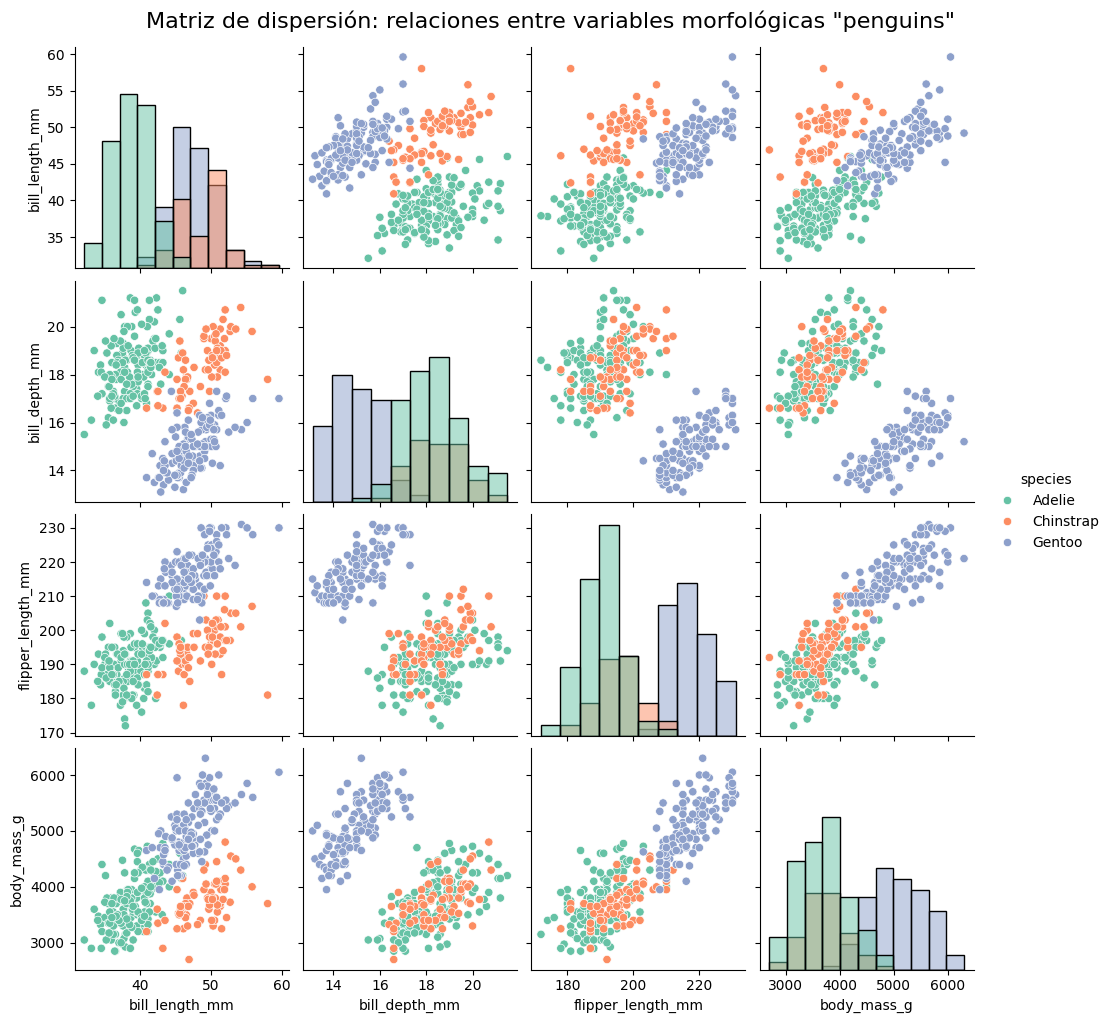

In [7]:
# Estandarizar variables numéricas
scaler = StandardScaler()
X_std = scaler.fit_transform(df_new)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

sns.pairplot(df, hue='species', palette='Set2', diag_kind='hist', corner=False)
plt.suptitle('Matriz de dispersión: relaciones entre variables morfológicas "penguins"', fontsize=16, y=1.02)
plt.show()

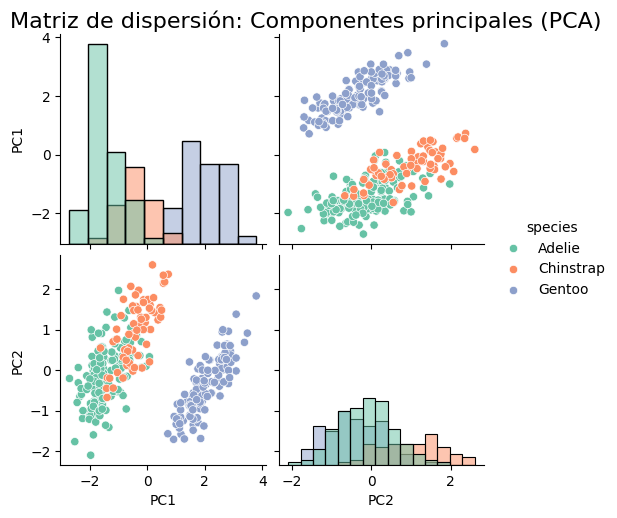

In [14]:
# Eliminar filas con NaN en df
df_clean = df.dropna().reset_index(drop=True)

# Variables numéricas
X = df_clean[df_new.columns]

# Estandarizar
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# DataFrame PCA + species
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['species'] = df_clean['species'].values

# Pairplot
sns.pairplot(df_pca, hue='species', palette='Set2', diag_kind='hist', corner=False)
plt.suptitle('Matriz de dispersión: Componentes principales (PCA)', fontsize=16, y=1.02)
plt.show()

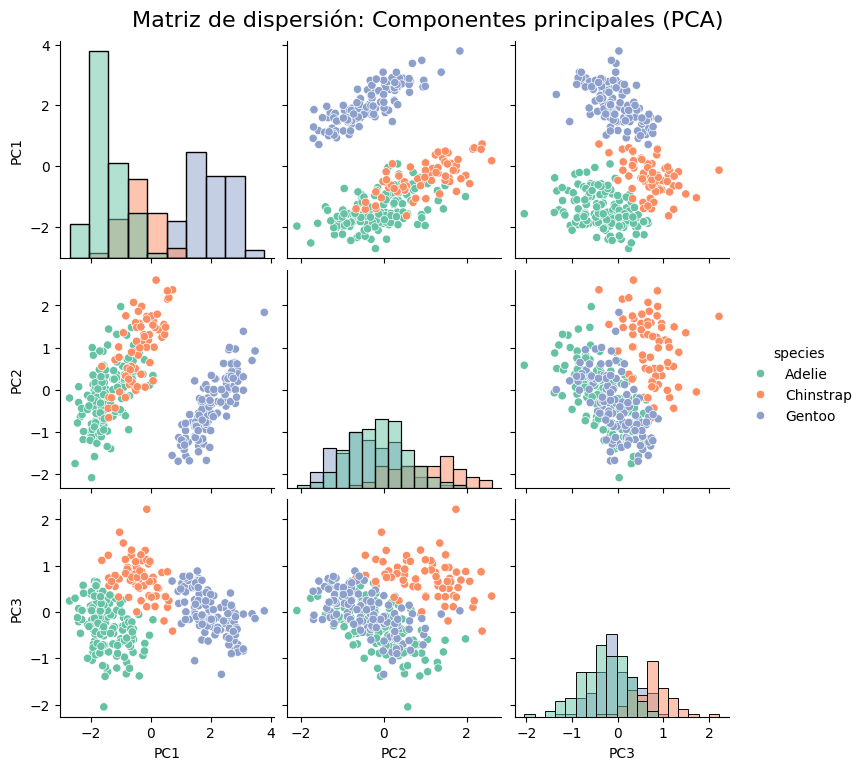

In [17]:
# Eliminar filas con NaN en df
df_clean = df.dropna().reset_index(drop=True)

# Variables numéricas
X = df_clean[df_new.columns]

# Estandarizar
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# DataFrame PCA + species
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['species'] = df_clean['species'].values  # ahora sí coinciden

# Pairplot
sns.pairplot(df_pca, hue='species', palette='Set2', diag_kind='hist', corner=False)
plt.suptitle('Matriz de dispersión: Componentes principales (PCA)', fontsize=16, y=1.02)
plt.show()

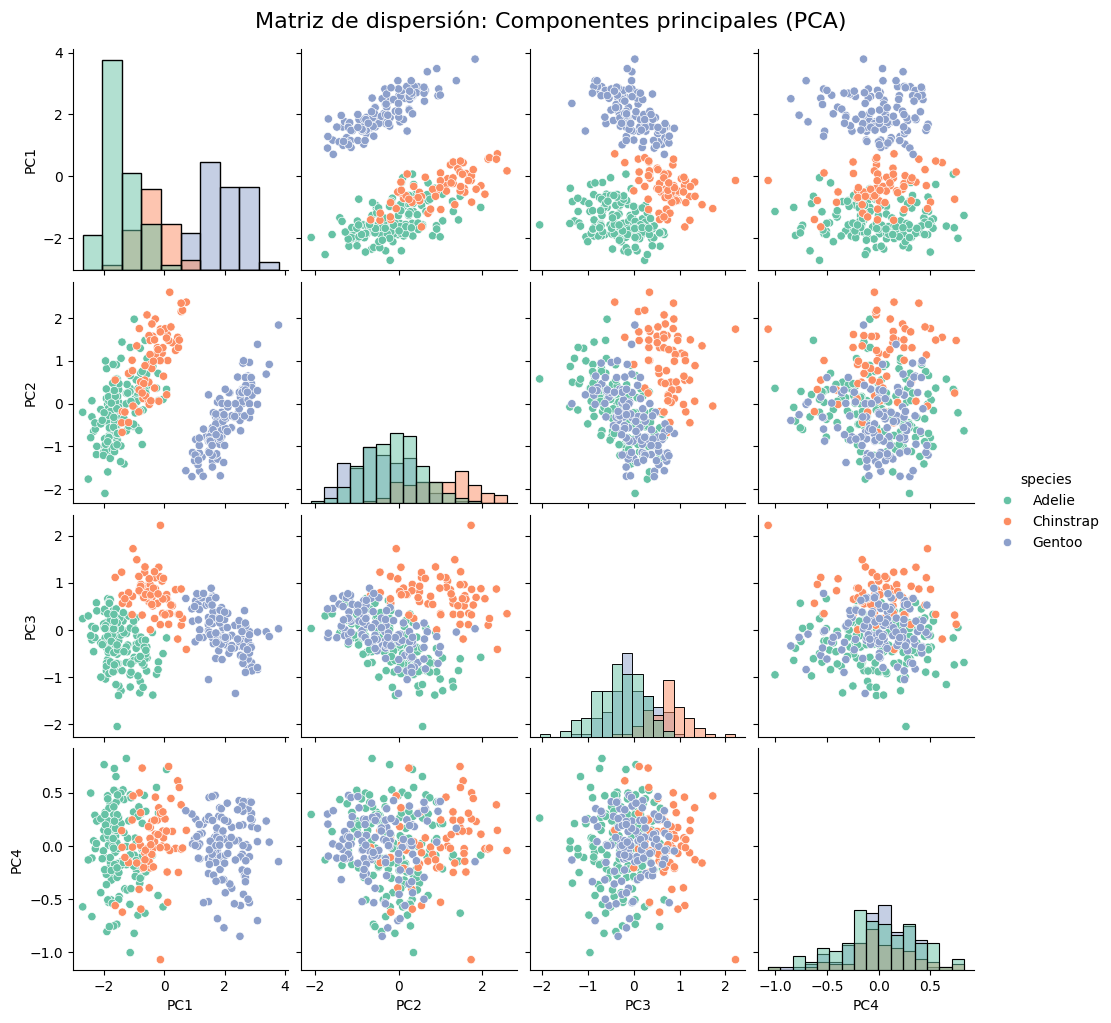

In [12]:
# Eliminar filas con NaN en df
df_clean = df.dropna().reset_index(drop=True)

# Variables numéricas
X = df_clean[df_new.columns]

# Estandarizar
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

# DataFrame PCA + species
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['species'] = df_clean['species'].values  # ahora sí coinciden

# Pairplot
sns.pairplot(df_pca, hue='species', palette='Set2', diag_kind='hist', corner=False)
plt.suptitle('Matriz de dispersión: Componentes principales (PCA)', fontsize=16, y=1.02)
plt.show()

Análisis: de los datos originales se decide eliminar los dos registros nulos existentes, ya que no representan un valor importante para su respectivo análisis, además de que interfieren en el estudio que se requiere hacer.

En el primer pairplot, se utilizo el df original, sin utilizar el PCA, así que hace una distinción entre las tres especies. Dónde se puede observar que realiza una muy buena estimación para la especie de "Gentoo", mientras que con las de "Adelie" y "Chinstrap" la diferenciación no es exacta.

Para el análisis de PCA, se evidencia que con menos componentes, es decir, 2, tiene el mismo comportamiento y con más componentes (4) la distinción empeora, se cruzan las observaciones aún más.

**Paso 1: Los componentes principales son combinaciones lineales de las variables originales**

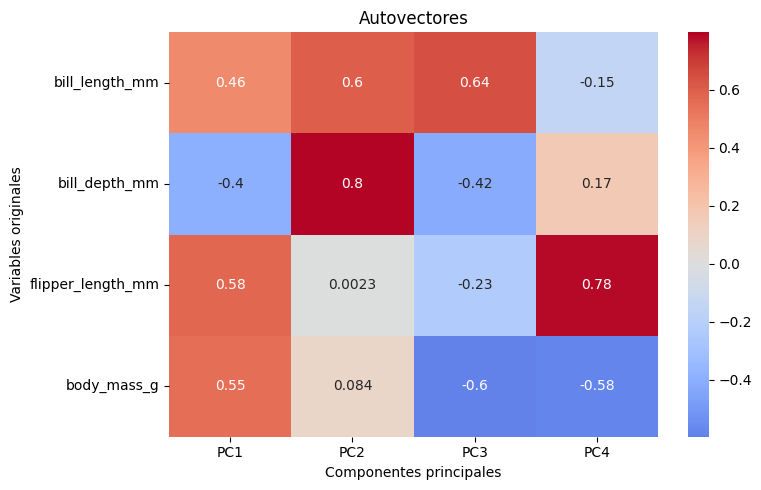

Ecuaciones de los componentes principales:

PC1 = 0.455·'bill_length_mm' + -0.4·'bill_depth_mm' + 0.576·'flipper_length_mm' + 0.548·'body_mass_g'
PC2 = 0.597·'bill_length_mm' + 0.798·'bill_depth_mm' + 0.002·'flipper_length_mm' + 0.084·'body_mass_g'
PC3 = 0.644·'bill_length_mm' + -0.418·'bill_depth_mm' + -0.232·'flipper_length_mm' + -0.597·'body_mass_g'
PC4 = -0.146·'bill_length_mm' + 0.168·'bill_depth_mm' + 0.784·'flipper_length_mm' + -0.58·'body_mass_g'


In [ ]:
# Matriz de componentes
componentes = pd.DataFrame(pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_new.columns)

# 📐 Visualización de autovectores
plt.figure(figsize=(8, 5))
sns.heatmap(componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Autovectores')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.tight_layout()
plt.show()

# Ecuaciones de los componentes principales con nombres reales
print("Ecuaciones de los componentes principales:\n")
for i, comp in enumerate(componentes.columns):
    pesos = pca.components_[i]
    ecuacion = " + ".join([
        f"{round(pesos[j], 3)}·'{df_new.columns[j]}'" for j in range(len(pesos))
    ])
    print(f"{comp} = {ecuacion}")

**PC1:** Parece ser una dimensión relacionada con el tamaño general del pingüino (más largo y pesado).

El signo negativo en bill_depth_mm indica que, a mayor profundidad del pico, menor valor en PC1.

**PC2:** Representa básicamente la morfología del pico. Flipper y body_mass casi no aportan.

**PC3:** Combina de forma contrapuesta bill_length_mm (positivo) con body_mass_g (negativo). Puede interpretarse como un contraste entre pico largo vs. cuerpo pesado.

**PC4:** Representa un contraste entre aletas largas vs. masa corporal pesada.

**Paso 2: Cada componente maximiza la varianza en su dirección**

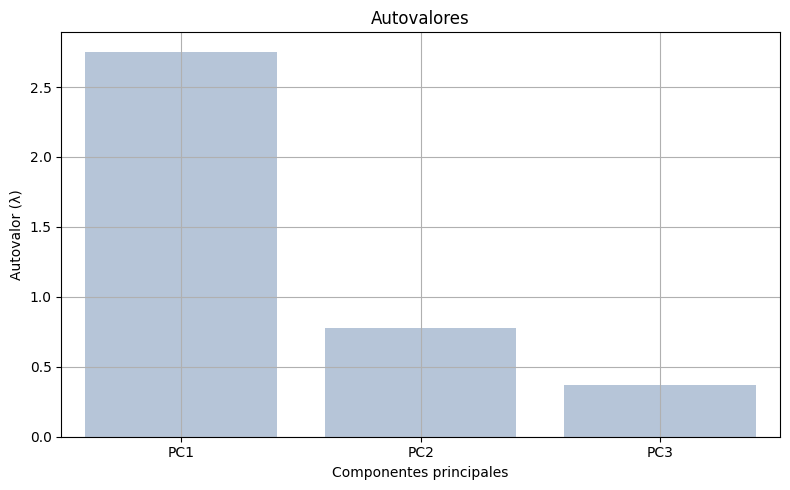

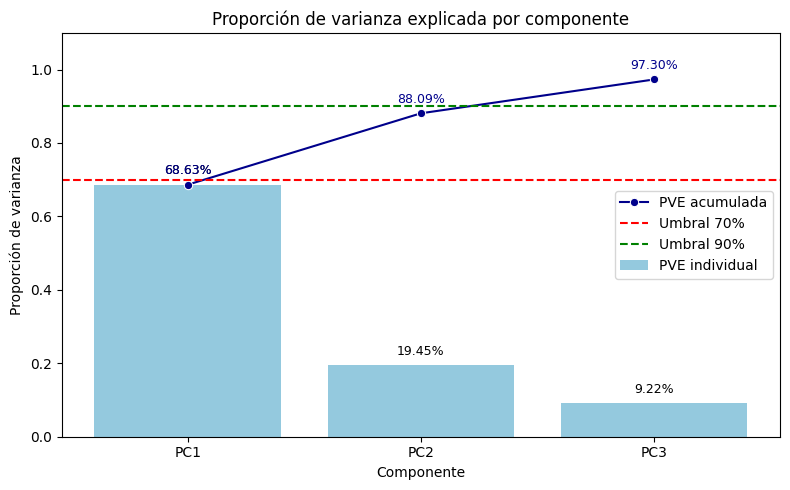

In [19]:
# Varianza explicada
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

# Autovalores
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores')
plt.ylabel('Autovalor (λ)')
plt.xlabel('Componentes principales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Proporción de varianza explicada
plt.figure(figsize=(8, 5))

# Barras
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')

# Línea
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')

# Líneas de referencia
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')

# Agregar porcentajes en las barras
for i, v in enumerate(df_varianza['PVE']):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontsize=9, color='black')

# Agregar porcentajes en los puntos de la línea
for i, v in enumerate(df_varianza['PVE acumulada']):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontsize=9, color='darkblue')

# Estética
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.ylim(0, 1.1)  # para que no se corten los textos
plt.legend()
plt.tight_layout()
plt.show()



De acuerdo con la gráfica anterior, es recomendable utilizar 2 PCA, ya que explican en 88.09% la varianza del los datos.

**Paso 3: Los componentes son ortogonales entre sí**

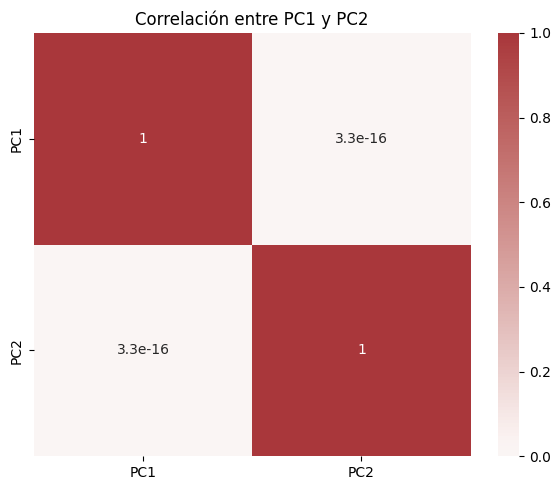

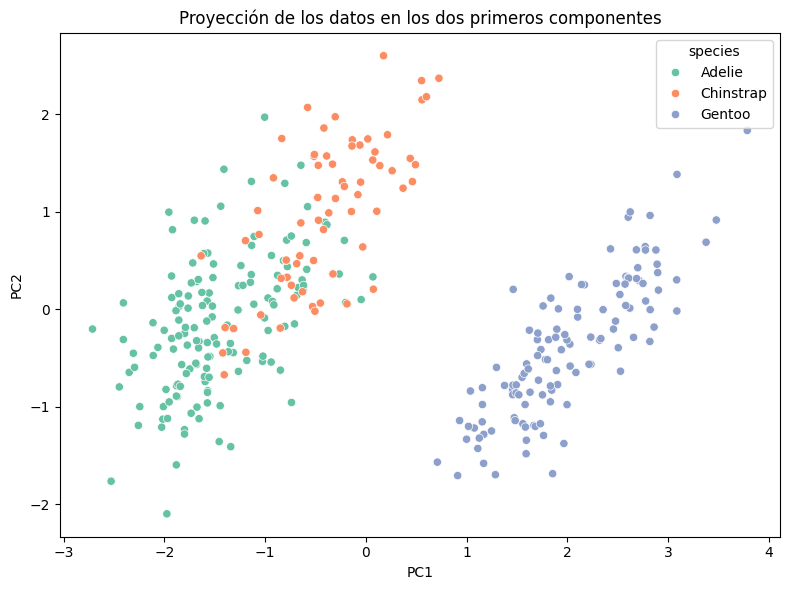

In [31]:
# Eliminar filas con NaN en df
df_clean = df.dropna().reset_index(drop=True)

# Variables numéricas
X = df_clean[df_new.columns]

# Estandarizar
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# DataFrame PCA + species
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df_clean['species'].values   # usar df_clean, no df

# Correlación
correlaciones = df_pca[['PC1','PC2']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones, annot=True, cmap='vlag', center=0)
plt.title('Correlación entre PC1 y PC2')
plt.tight_layout()
plt.show()

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title('Proyección de los datos en los dos primeros componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


Finalmente, se podría decir que de acuerdo al heat map, con los valores muy cercanos a cero los PC son ortogonales, es decir, que cada PC aporta información distinta. Adicionalmente, se puede concluír que la especie Gentoo tiene un nivel de agrumiento más determinado en comparación con Adelie y Chinstrap.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  


A partir de una data set relacionado con características propias de diamantes, se analiza, teniendo en cuenta conceptos de Regresión Lineal Múltiple.


In [4]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# 1: Definir variables
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
Y = df['price']

# Dividir la base de datos
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=42)


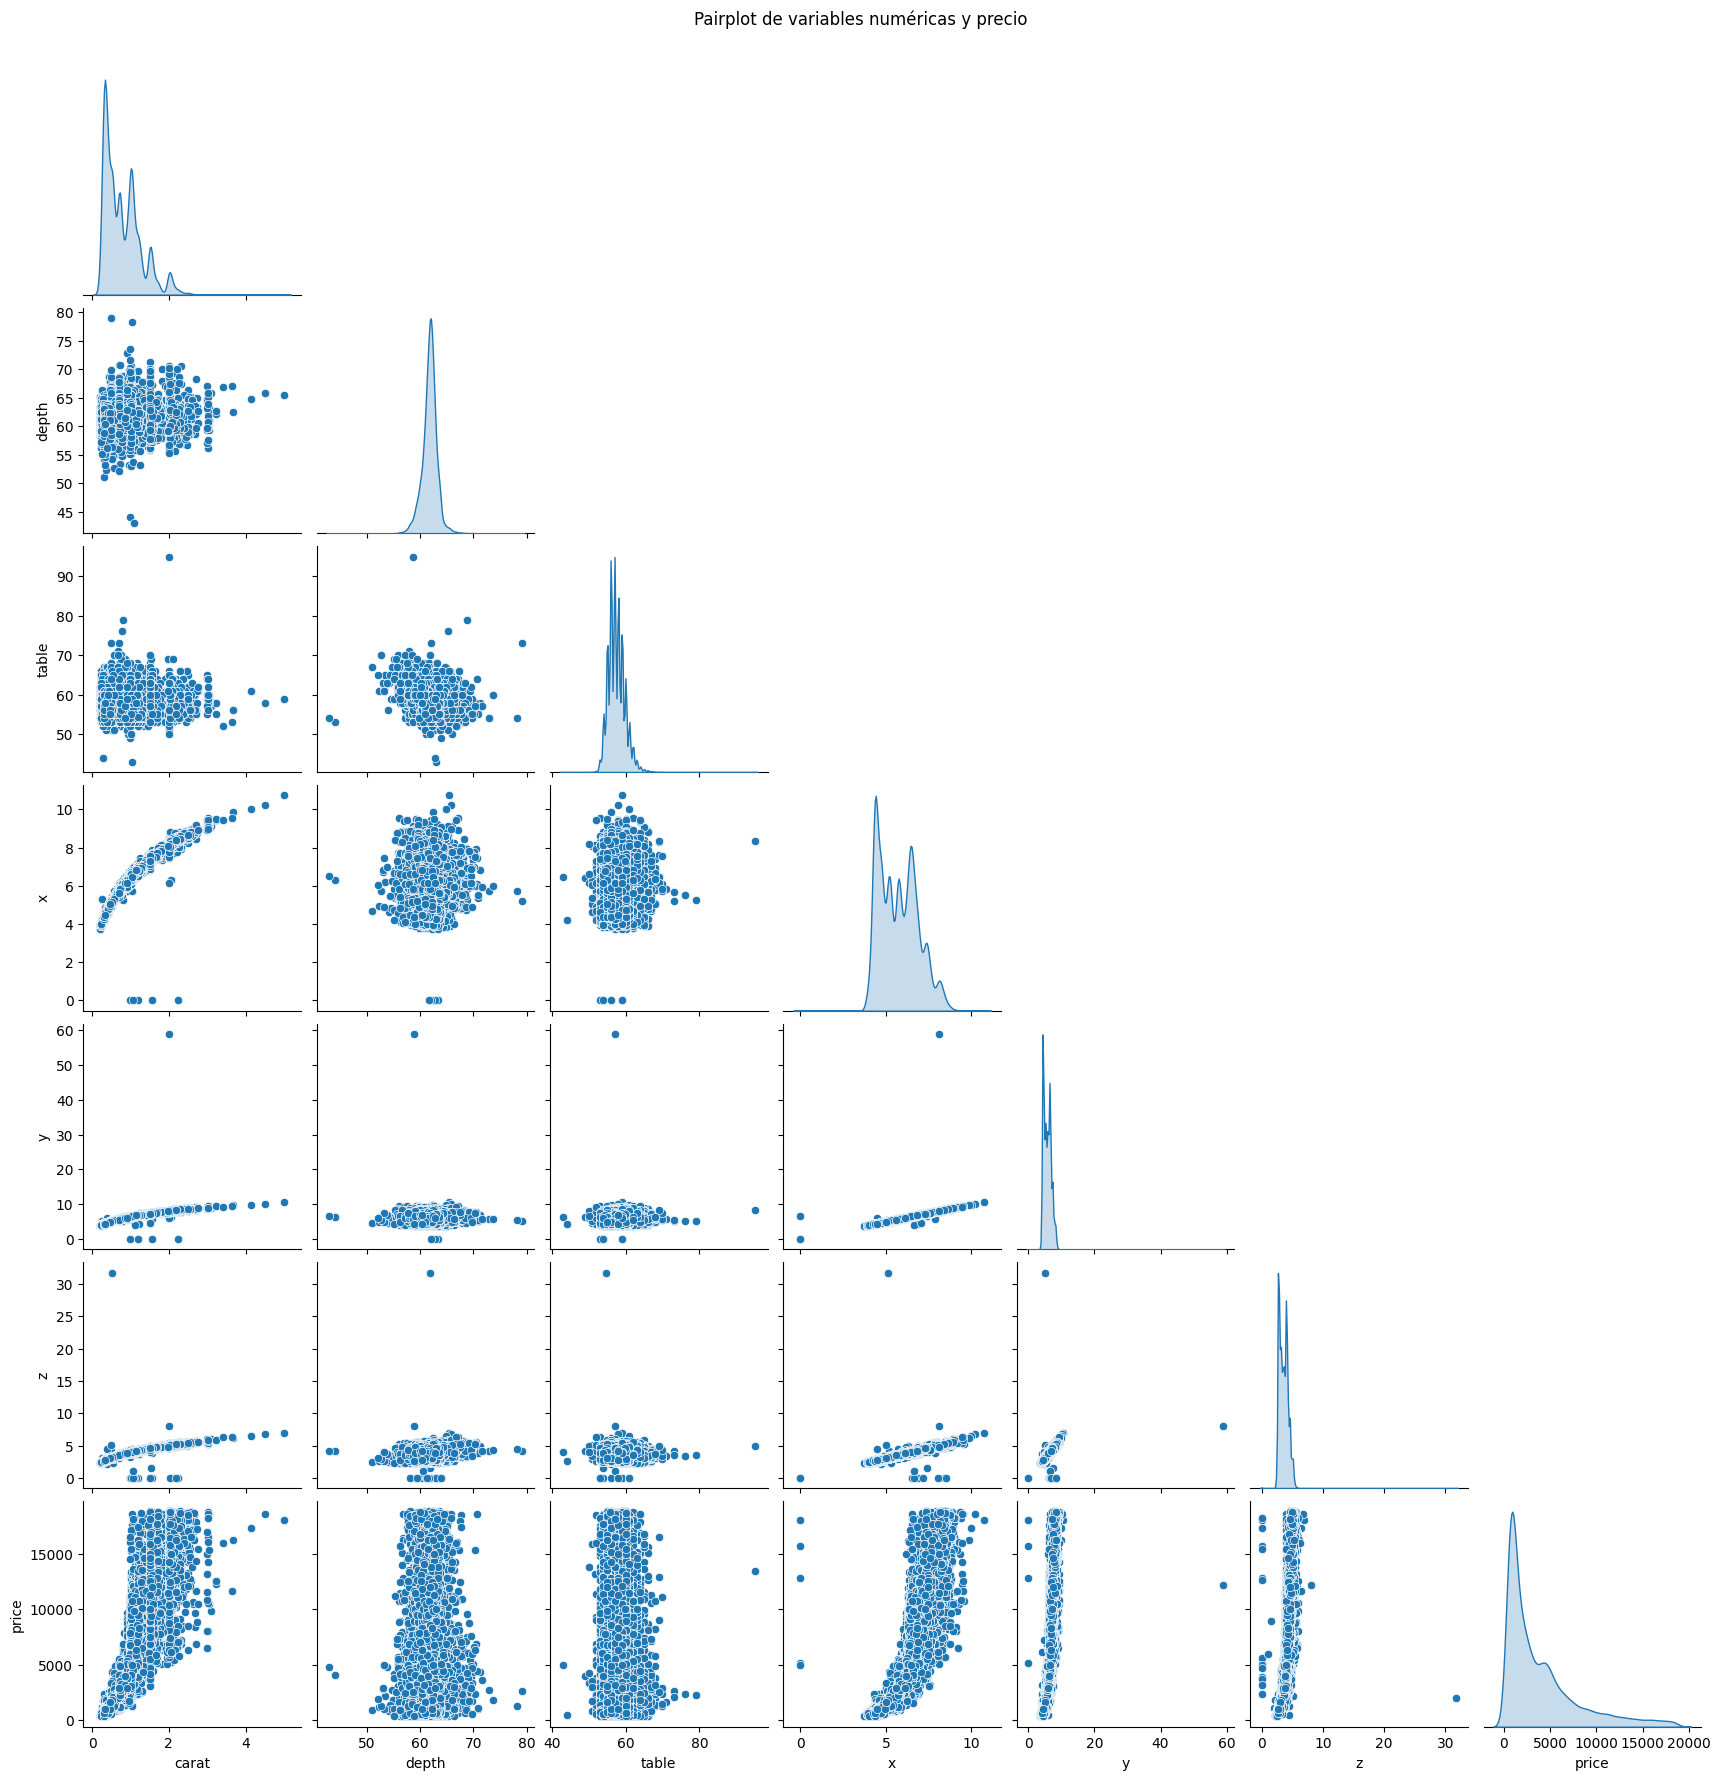

In [4]:
# Variables predictoras y variable objetivo
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
Y = df['price']

# Dividir en train y test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

# Crear un DataFrame que incluya también 'price'
df_train = X_train.copy()
df_train['price'] = Y_train.values

# Pairplot
sns.pairplot(df_train, diag_kind="kde", corner=True)
plt.suptitle("Pairplot de variables numéricas y precio", y=1.02)
plt.show()


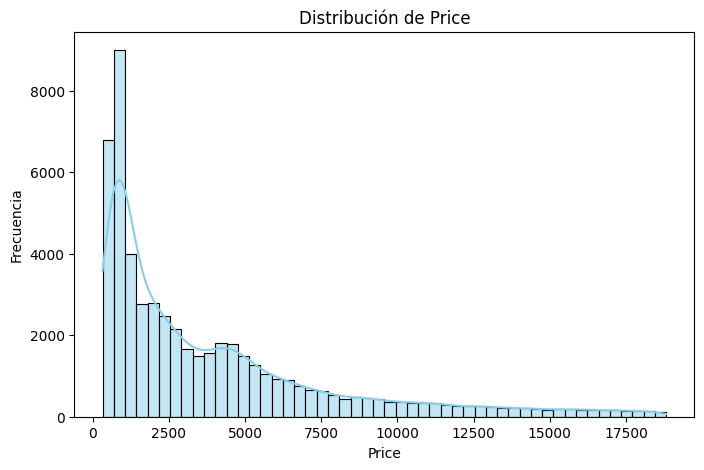

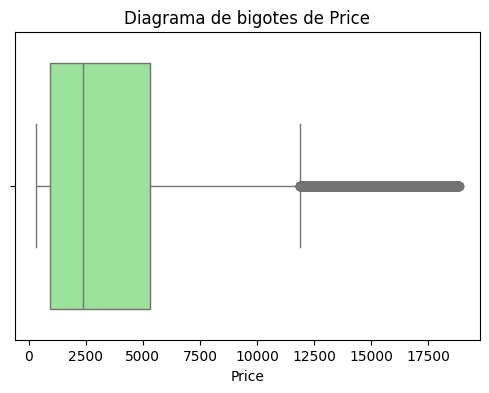

In [35]:
# Histograma de price
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True, color="skyblue")
plt.title("Distribución de Price")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de price
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], color="lightgreen")
plt.title("Diagrama de bigotes de Price")
plt.xlabel("Price")
plt.show()


Podemos evidenciar que la variable "price" tiene una cantidad alta de valores atípicos que es necesario validar, además de una acumulación de datos entre cero y 2.500. Sería pertinente hacer una limpieza de datos antes de realizar análisis de modelos.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 3.834e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:14:19   Log-Likelihood:            -3.2982e+05
No. Observations:               37758   AIC:                         6.596e+05
Df Residuals:                   37751   BIC:                         6.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.057e+04    530.642     38.773      0.0

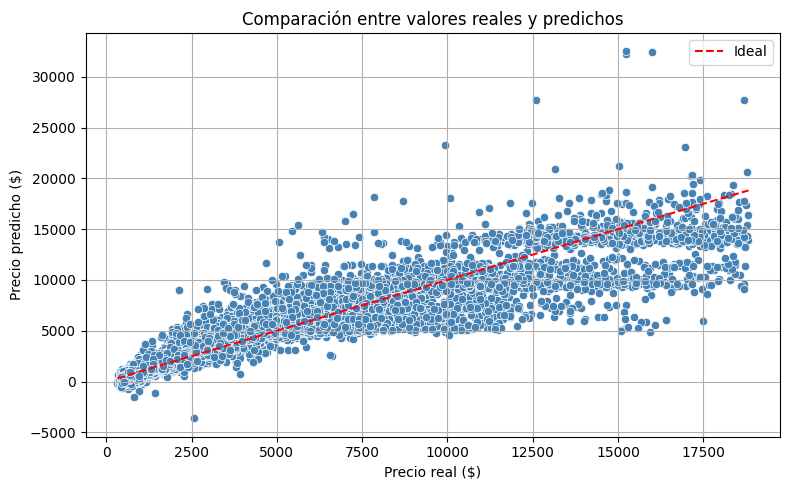

In [36]:
# Agregar constante en train y test
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Ajustar el modelo
model = sm.OLS(Y_train, X_train_const).fit()
print(model.summary())

# Predicciones
Y_pred = model.predict(X_test_const)

# Gráfico de comparación
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_test, y=Y_pred, color='steelblue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='red', linestyle='--', label='Ideal')
plt.xlabel('Precio real ($)')
plt.ylabel('Precio predicho ($)')
plt.title('Comparación entre valores reales y predichos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

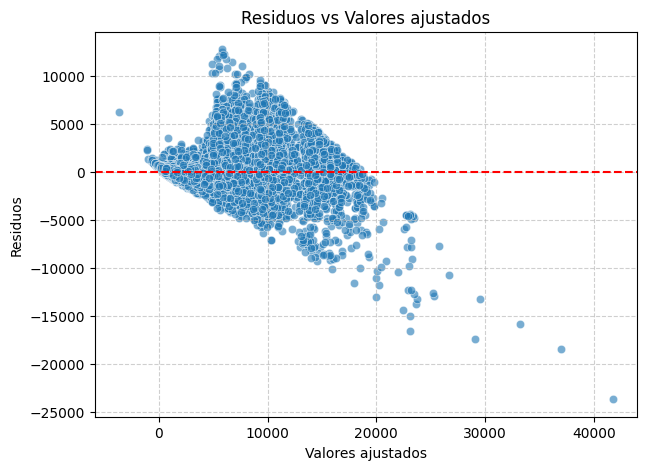

In [37]:
# Supuesto de linealidad

# Valores ajustados (predichos para el set de entrenamiento)
fitted_vals = model.fittedvalues
residuals = model.resid

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores ajustados")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



Por el comportamiento del gráfico, se podría afirmar que los datos no siguen una distribución lineal, ya que intenta hacer un patrón de embudo y hay existencia de varios datos atípicos.

In [40]:
# Prueba de independencia

# Prueba de Durbin-Watson
dw = durbin_watson(residuals)
print(f"Durbin-Watson: {dw:.3f} → ¿Cercano a 2?")



Durbin-Watson: 1.990 → ¿Cercano a 2?


A demás del gráfico de pairplot, se realiza la prueba de Durbin-Watson, dónde se podría afirmar que los datos se comportan de forma independiente, por su valor cercano a 2.

In [41]:
# Prueba de homoscedasticidad

#  Prueba de Breusch–Pagan
bp_homo = het_breuschpagan(model.resid, model.model.exog)
print(f"p-valor: {bp_homo[1]:.4f} → {'No hay evidencia de heterocedasticidad' if bp_homo[1] > 0.05 else 'Posible heterocedasticidad'}")

p-valor: 0.0000 → Posible heterocedasticidad


Complementando el gráfico de residuos Vs. valores ajustados, dónde se evidencia un comportamiento similar a un embudo, se realiza la prueba de Breush-Pagan, que indica posible existencia de heterocedasticidad, es decir que la varianza de los errores aumenta con el valor de la variable predictora.

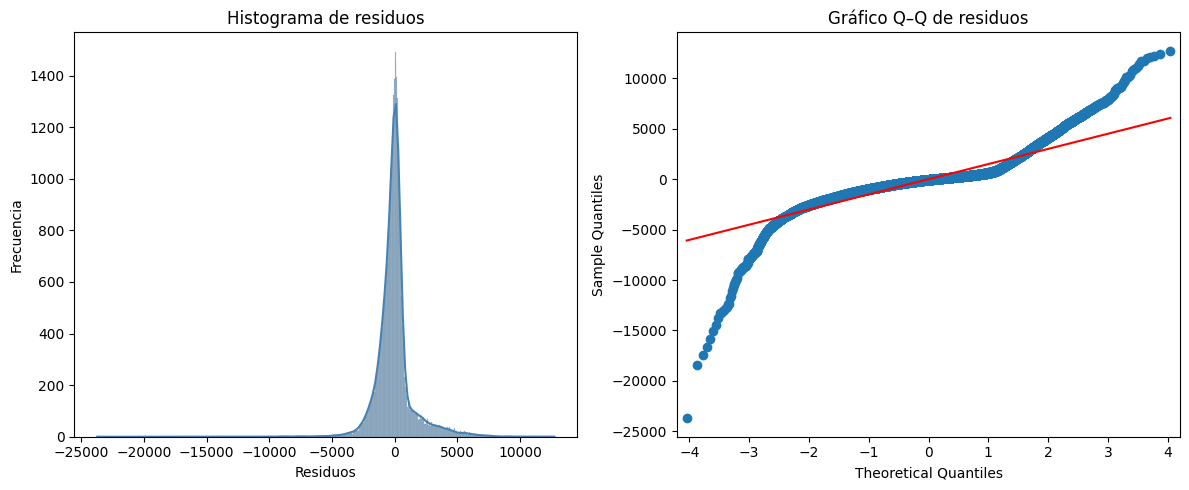

Prueba de Shapiro–Wilk
Estadístico: 0.8247
p-valor: 0.0000 → No se cumple la normalidad

Prueba de Kolmogorov–Smirnov
Estadístico: 0.1813, p-valor: 0.0000 → No normalidad


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37758.
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
# 1: Definir variables
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
Y = df['price']

# Dividir la base de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Ajustar modelo OLS con statsmodels
X_const = sm.add_constant(X_train)   # se agrega constante para el intercepto
model = sm.OLS(Y_train, X_const).fit()
resid = model.resid

# --- Visualización ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de residuos
sns.histplot(resid, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title("Histograma de residuos")
axes[0].set_xlabel("Residuos")
axes[0].set_ylabel("Frecuencia")

# Q–Q plot
qqplot(resid, line='s', ax=axes[1])
axes[1].set_title("Gráfico Q–Q de residuos")

plt.tight_layout()
plt.show()

# --- Prueba de Shapiro–Wilk ---
stat, p_value = shapiro(resid)
print("Prueba de Shapiro–Wilk")
print(f"Estadístico: {stat:.4f}")
print(f"p-valor: {p_value:.4f} → {'Se asume normalidad' if p_value > 0.05 else 'No se cumple la normalidad'}")

# --- Prueba de Kolmogorov–Smirnov ---
# Estandarizar residuos
resid_std = (resid - np.mean(resid)) / np.std(resid)
stat_ks, p_value_ks = kstest(resid_std, 'norm')

print("\nPrueba de Kolmogorov–Smirnov")
print(f"Estadístico: {stat_ks:.4f}, p-valor: {p_value_ks:.4f} → {'Se asume normalidad' if p_value_ks > 0.05 else 'No normalidad'}")


De acuerdo a las gráficas presentadas anteriormente, se evidencia que los datos no cumplen con el supuesto de normalidad, ya que las colas que tiene son muy amplias y cubren un espacio grande de la gráfica, adicionalmente las pruebas de Shapiro y Kolmogorov indican que no cumple con el supuesto de normalidad.

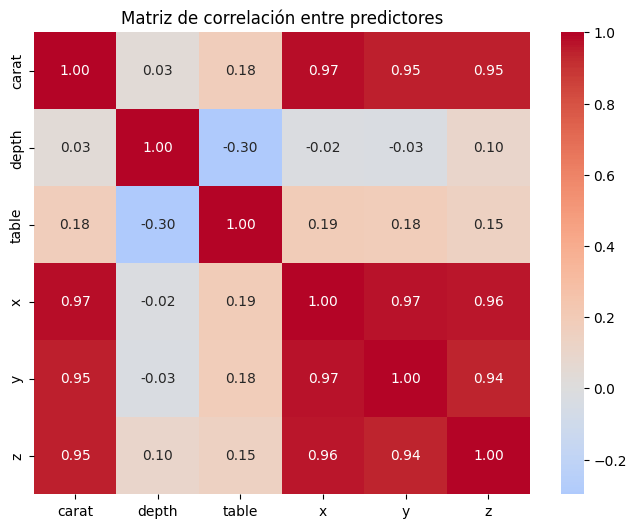


📊 VIF de las variables predictoras:
  Variable          VIF
0    const  4697.376314
1    carat    21.510515
2    depth     1.412011
3    table     1.142862
4        x    49.597622
5        y    18.348291
6        z    17.536678


In [5]:
# Supuesto de Multicolinealidad


# 2. Matriz de correlación de los predictores

plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación entre predictores")
plt.show()

# 3. Cálculo de VIF (Variance Inflation Factor)

def calcular_vif(X):
    X_const = sm.add_constant(X)  # añadir constante para el modelo
    vif = pd.DataFrame()
    vif["Variable"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                  for i in range(X_const.shape[1])]
    return vif

print("\n📊 VIF de las variables predictoras:")
print(calcular_vif(X_train))





In [ ]:
# 4. Índice de condición (Condition Index)

def calcular_indice_condicion(X):
    X_const = sm.add_constant(X)
    _, s, _ = svd(X_const)  # descomposición en valores singulares
    return max(s) / min(s)

print("\n📊 Índice de condición:")
print(f"{calcular_indice_condicion(X_train):.2f}")


📊 Índice de condición:


Según la matriz de correlación se evidencia que los valores cercanos a 1 son muy altos y que los valores cercanos a cero son bajos, a demás hay más valores cercanos a cero que valores cercanos a uno. Por otro lado los valos VIF son muy altos y el índice de condición (colab se queda colgado) lo que indica que puede haber presencia de multicolinealidad.

Conclusión.
Se podría indicar que con las anteriores pruebas realizadas al ser de datos de "emerald", los datos **no siguen una distribución lineal**, podrían tener un **comportamiento independiente** ,** hay evidencia de heterocedasticidad**, **no tienen un comportamiento normal**  y que puede haber **presencia de multicolinealidad**.